In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = sns.load_dataset('titanic')

In [4]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
desc_stats = df.describe() 
print('stats breakdown', desc_stats)

stats breakdown          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


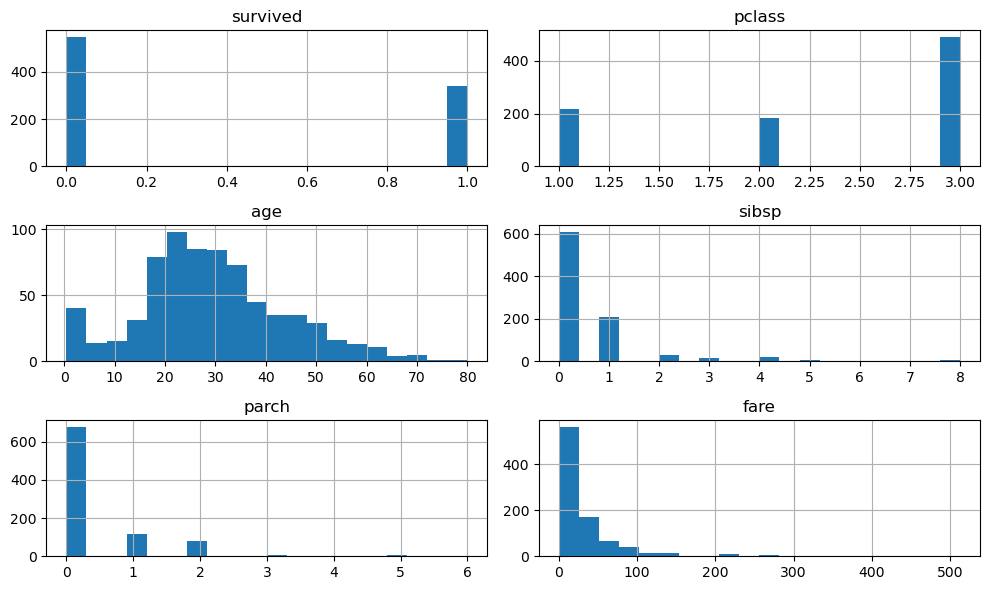

In [11]:
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


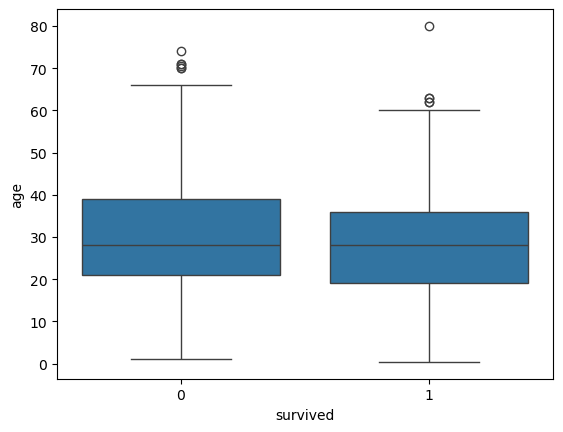

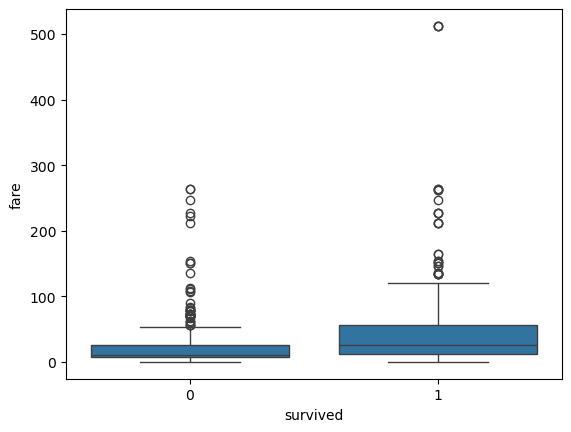

In [12]:
# Boxplots for checking for outliers in Age and Fare
sns.boxplot(x='survived', y='age', data=df)
plt.show()

sns.boxplot(x='survived', y='fare', data=df)
plt.show()

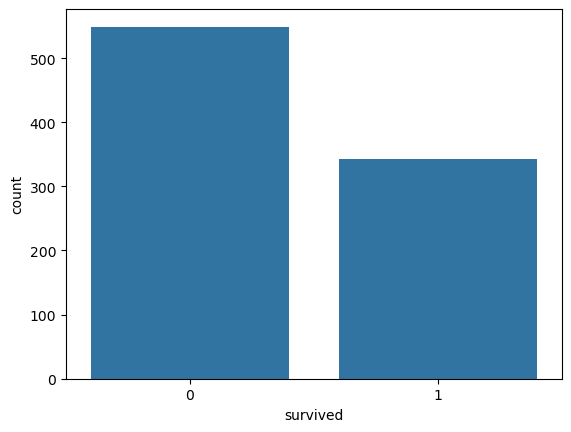

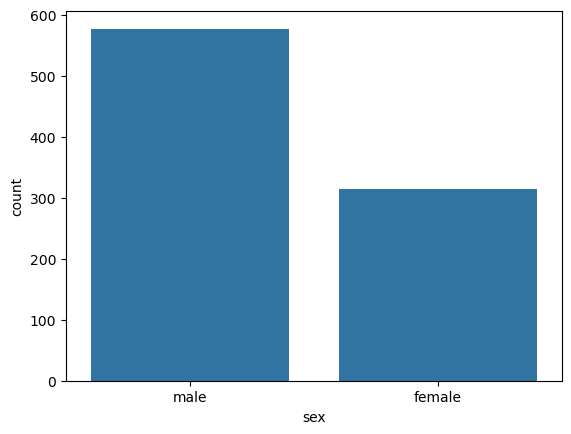

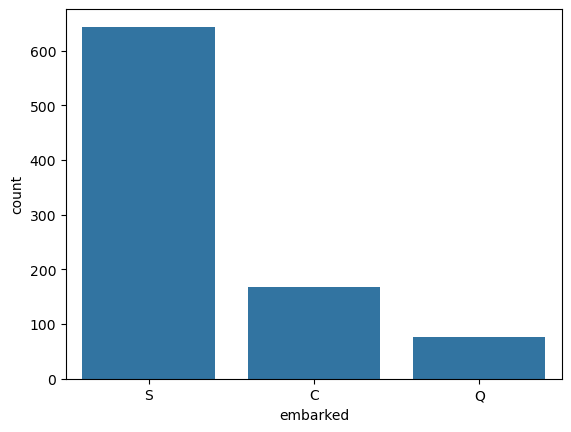

In [13]:
# Count plot for categorical data (Survived and Sex)
sns.countplot(x='survived', data=df)
plt.show()

sns.countplot(x='sex', data=df)
plt.show()

sns.countplot(x='embarked', data=df)
plt.show()